In [24]:
# Notebook to study the gammas emmited from the 2nubb events
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import os
import sys
import tables as tb
import numpy  as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from matplotlib.colors import LogNorm  # Import LogNorm for logarithmic color scale
from matplotlib.cm import get_cmap

# Create a sequential colormap
cmap = get_cmap('Spectral')  # You can choose any sequential colormap here

plt.rcParams['figure.facecolor'] = 'w'

# plt.rcParams["font.size"] = 15
# plt.rcParams["figure.figsize"] = 11,9

## Load in the files and print info

In [25]:
# Loading in the files
files = []

mode = "esmeralda"

if (mode == "nexus"):
    files.append("../data/nexus/LPR_Tl208_Ports/NEXT100_LPR_Tl208_PORT1a_slim.h5") # LPR Port 1A event
else:
    files.append("../data/nexus/LPR_Tl208_Ports/NEXT100_LPR_Tl208_PORT1a_esmeralda_slim.h5") # LPR Port 1A event

print(files)

config_v = []
parts_v  = []
hits_v   = []
chits_v = []
 
for index, f in enumerate(files):
    
    if (mode == "nexus"):
        config_v.append(pd.read_hdf(f, 'config'))
    else:
        chits_v.append(pd.read_hdf(f, 'lt_chits',  columns = ["event", "X", "Y", "Z", "Ec"]))

    
    parts_v .append(pd.read_hdf(f, 'parts', columns = ["event_id", "particle_id", "mother_id","particle_name", "creator_proc", "final_proc", "kin_energy", "initial_volume", "final_volume", "final_x", "final_y", "final_z"]))
    hits_v  .append(pd.read_hdf(f, 'hits',  columns = ["event_id", "x", "y", "z", "energy", "particle_id"]))
    
if (mode == "nexus"):
    display(config_v[0])
else:
    # Divide the event numbers for the reco by two
    chits_v[0].event = chits_v[0].event//2 # Double slash is integer division
    
    display(chits_v[0])



['../data/nexus/LPR_Tl208_Ports/NEXT100_LPR_Tl208_PORT1a_esmeralda_slim.h5']


,event,X,Y,Z,Ec
0,990000,443.175,209.925,164.372818,0.003422
1,990000,427.625,209.925,165.400772,0.001422
2,990000,427.625,225.475,165.400772,0.001345
3,990000,443.175,209.925,165.400772,0.001367
4,990000,427.625,209.925,166.434723,0.003195
...,...,...,...,...,...
1228,80338,225.475,256.575,734.436340,0.000939
1229,80338,241.025,256.575,734.436340,0.001099
1230,80338,225.475,225.475,735.472168,0.003269
1231,80338,241.025,241.025,735.472168,0.003645


In [56]:
## Particles
pd.set_option('display.max_rows', 20)  # Change 1000 to your desired maximum number
pd.set_option('display.max_rows', 700) 
display(parts_v[0][parts_v[0].event_id == 990001])
display(hits_v[0][hits_v[0].event_id == 990001])

# Get the MC scale factor
# The data source rate is 5kBq and trigger efficiency is 97%
# Normalize the total data rate with the total generated MC events
# Scale everything to a total length of a calibration day which is 24hr
# There was 10k events and 300 files generated for the MC campaign
scale_factor = (5000*24*60*60*0.97)/(300*10e3)
scale_factor = 1
print("MC Scale Factor: ", scale_factor)


,event_id,particle_id,mother_id,particle_name,creator_proc,final_proc,kin_energy,initial_volume,final_volume,final_x,final_y,final_z
38,990001,1,0,Tl208,none,RadioactiveDecay,0.000000,PORT_TUBE_AIR,PORT_TUBE_AIR,400.029755,395.959412,531.546570
39,990001,4,1,e-,RadioactiveDecay,eIoni,0.849722,PORT_TUBE_AIR,PORT_TUBE_1a,404.729065,409.840790,532.077698
40,990001,3,1,anti_nu_e,RadioactiveDecay,Transportation,0.440704,PORT_TUBE_AIR,WORLD,2982.102539,-12500.000000,8961.445312
41,990001,2,1,Pb208[3708.451],RadioactiveDecay,RadioactiveDecay,0.000003,PORT_TUBE_AIR,PORT_TUBE_AIR,400.029755,395.959412,531.546570
42,990001,6,2,gamma,RadioactiveDecay,phot,1.093926,PORT_TUBE_AIR,ICS,432.724762,365.904663,509.856750
43,990001,20,6,e-,phot,msc,0.000060,ICS,ICS,432.724762,365.904663,509.856750
44,990001,19,6,e-,phot,eIoni,0.000868,ICS,ICS,432.724762,365.904663,509.856750
45,990001,18,6,gamma,phot,phot,0.007985,ICS,ICS,432.734650,365.904968,509.856018
46,990001,24,18,e-,phot,msc,0.000060,ICS,ICS,432.734650,365.904968,509.856018
47,990001,23,18,e-,phot,eIoni,0.000918,ICS,ICS,432.734650,365.904968,509.856018


,event_id,x,y,z,energy,particle_id
140,990001,-254.782990,-200.043503,722.925781,5.788000e-05,26
141,990001,-254.782944,-200.043427,722.925842,4.586000e-05,30
142,990001,-254.783066,-200.043503,722.925598,3.388000e-05,29
143,990001,-254.782990,-200.043411,722.925598,1.036000e-05,28
144,990001,-255.381317,-200.770447,723.259705,1.919287e-03,27
145,990001,-256.072540,-201.450455,723.498840,5.170664e-03,27
146,990001,-256.748413,-202.110474,723.825134,2.519209e-03,27
147,990001,-256.848145,-202.203995,723.870178,3.956099e-04,27
148,990001,-257.558258,-202.870178,724.097229,1.722634e-03,27
149,990001,-258.273651,-203.529846,724.325073,4.843754e-03,27


MC Scale Factor:  1


# Identify if events were compton scatter or pair conversion
- We are only interested in the pair conversion events
- Compton scatter events are a background because we dont know the primary event energy

In [27]:
prim_gammas = parts_v[0][ (parts_v[0].particle_name == "gamma") & ( round(parts_v[0].kin_energy) == round(2.6145043)) ] # Primary gammas
prim_gammas = prim_gammas[["event_id", "particle_id"]]
prim_gammas.rename(columns={'particle_id': 'pgam_id'}, inplace=True)

# This gets rid of the small fraction of events that do not have the 2.6 MeV gamma (0.01%)
parts_v[0] = parts_v[0][parts_v[0].event_id.isin(prim_gammas.event_id.unique())]

merged_df = pd.merge(parts_v[0], prim_gammas, on='event_id', how='inner')


daughters = merged_df[ merged_df.mother_id == merged_df.pgam_id  ]
# If the primary electron is the direct decendant from the gamma, its particle id should be sequential
display(daughters[ (daughters.creator_proc == "phot") & (daughters.particle_id == daughters.pgam_id+1)])
photopeak_ev_ids = daughters[(daughters.creator_proc == "phot") & (daughters.particle_id == daughters.pgam_id+1)].event_id.unique()
pair_ev_ids      = daughters[(daughters.creator_proc == "conv") & (daughters.particle_id == daughters.pgam_id+1)].event_id.unique()
compt_ev_ids     = daughters[(daughters.creator_proc == "compt") & (daughters.particle_id == daughters.pgam_id+1)].event_id.unique()

print(len(photopeak_ev_ids) + len(pair_ev_ids) + len(compt_ev_ids))


# Get the event id's where the gamma pair coverted. These are the signal events, all others are bkg
# pair_cov_gamma_ev_ids = prim_gammas[prim_gammas.final_proc == "conv"].event_id.unique()


print(len(parts_v[0].event_id.unique()), len(prim_gammas.event_id.unique()))


,event_id,particle_id,mother_id,particle_name,creator_proc,final_proc,kin_energy,initial_volume,final_volume,final_x,final_y,final_z,pgam_id
1018,990015,39,38,e-,phot,eIoni,2.579948,ACTIVE,ACTIVE,-85.179443,384.467163,142.808228,38
17509,990244,21,20,e-,phot,eIoni,2.614296,ACTIVE,ACTIVE,-190.854523,-434.765076,406.680634,20
18439,990260,22,21,e-,phot,eIoni,2.609087,ACTIVE,ACTIVE,271.028229,-97.403908,1114.136841,21
19328,990273,61,60,e-,phot,eIoni,2.605561,ICS,ICS,390.016022,426.635773,550.616272,60
25677,1000014,20,19,e-,phot,eIoni,2.579948,ACTIVE,ACTIVE,-295.373871,271.802002,649.613281,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7320047,970148,34,33,e-,phot,eIoni,2.579948,ACTIVE,ACTIVE,116.822701,42.024445,595.389648,33
7322274,970174,53,52,e-,phot,eIoni,2.526214,LEAD_BOX,LEAD_BOX,806.935791,548.438477,394.953247,52
7335158,980009,55,54,e-,phot,eIoni,2.605561,ICS,ICS,423.470825,378.545197,507.387970,54
7337410,980042,35,34,e-,phot,eIoni,2.579948,ACTIVE,ACTIVE,349.038147,-58.017162,489.563354,34


91401
91401 91401


In [28]:
evt = parts_v[0][parts_v[0].event_id == 78]
elec = evt[(evt.particle_name == "e-")]
gam  = evt[(evt.particle_name == "gamma")]

elec = elec[elec.particle_id.isin(gam.particle_id+1)]
# gam_par = evt[ (evt.particle_id.isin(elec.mother_id.unique())) & (evt.particle_name == "gamma")]

print(len(gam), len(elec))

display(elec.sort_values(by='particle_id'))
display(gam.sort_values(by='particle_id'))
display(evt.sort_values(by='particle_id'))

8 7


,event_id,particle_id,mother_id,particle_name,creator_proc,final_proc,kin_energy,initial_volume,final_volume,final_x,final_y,final_z
5758,78,7,6,e-,compt,eIoni,0.033254,ICS,ICS,410.149811,379.544708,531.036499
5749,78,17,16,e-,phot,eIoni,0.000380,LIGHT_TUBE_DRIFT,LIGHT_TUBE_DRIFT,-484.164703,114.082573,303.702637
5803,78,21,20,e-,compt,eIoni,1.732364,ACTIVE,ACTIVE,381.314209,-54.267754,679.663391
5790,78,25,20,e-,compt,eIoni,0.000181,ACTIVE,ACTIVE,-52.504192,-89.911903,591.699585
5763,78,33,20,e-,phot,eIoni,0.000542,ACTIVE,ACTIVE,344.921936,-283.001556,720.336975
5808,78,69,21,e-,eIoni,eIoni,0.069337,ACTIVE,ACTIVE,344.185852,-94.678383,610.793274
5823,78,77,68,e-,phot,eIoni,0.002922,ACTIVE,ACTIVE,347.730652,-78.437889,603.607910


,event_id,particle_id,mother_id,particle_name,creator_proc,final_proc,kin_energy,initial_volume,final_volume,final_x,final_y,final_z
5746,78,6,2,gamma,RadioactiveDecay,phot,0.583188,PORT_TUBE_AIR,LIGHT_TUBE_DRIFT,-484.164886,114.082733,303.702545
5747,78,16,6,gamma,phot,phot,0.000671,LIGHT_TUBE_DRIFT,LIGHT_TUBE_DRIFT,-484.164703,114.082573,303.702637
5760,78,20,5,gamma,RadioactiveDecay,phot,2.614504,PORT_TUBE_AIR,ACTIVE,344.921478,-283.002075,720.336670
5791,78,24,20,gamma,compt,phot,0.033629,ACTIVE,ACTIVE,-43.579346,-151.820618,574.405273
5771,78,31,20,gamma,phot,phot,0.029781,ACTIVE,ACTIVE,358.883759,-252.582169,739.439270
5764,78,32,20,gamma,phot,phot,0.004097,ACTIVE,ACTIVE,344.924500,-283.012421,720.354309
5810,78,68,21,gamma,eBrem,phot,0.080128,ACTIVE,ACTIVE,347.733490,-78.438210,603.603149
5824,78,76,68,gamma,phot,phot,0.029781,ACTIVE,ACTIVE,357.079987,-44.482967,611.572754


,event_id,particle_id,mother_id,particle_name,creator_proc,final_proc,kin_energy,initial_volume,final_volume,final_x,final_y,final_z
5742,78,1,0,Tl208,none,RadioactiveDecay,0.000000e+00,PORT_TUBE_AIR,PORT_TUBE_AIR,395.744476,393.953217,535.529358
5745,78,2,1,Pb208[3197.711],RadioactiveDecay,RadioactiveDecay,1.050875e-05,PORT_TUBE_AIR,PORT_TUBE_AIR,395.744476,393.953217,535.529358
5744,78,3,1,anti_nu_e,RadioactiveDecay,Transportation,6.919812e-01,PORT_TUBE_AIR,WORLD,-1620.361816,12500.000000,-11868.186523
5743,78,4,1,e-,RadioactiveDecay,eIoni,1.109177e+00,PORT_TUBE_AIR,PORT_TUBE_1a,399.704834,395.120117,531.670715
5759,78,5,2,Pb208[2614.522],RadioactiveDecay,RadioactiveDecay,8.779461e-07,PORT_TUBE_AIR,PORT_TUBE_AIR,395.744476,393.953217,535.529358
...,...,...,...,...,...,...,...,...,...,...,...,...
5829,78,91,76,e-,phot,eIoni,4.027340e-03,ACTIVE,ACTIVE,357.074921,-44.490406,611.575623
5828,78,92,76,e-,phot,eIoni,5.419600e-04,ACTIVE,ACTIVE,357.080048,-44.483089,611.573364
5827,78,93,76,e-,phot,msc,4.792000e-05,ACTIVE,ACTIVE,357.079895,-44.482891,611.572754
5826,78,94,76,e-,phot,msc,4.447000e-05,ACTIVE,ACTIVE,357.079803,-44.483055,611.572754


#### Apply containment and sum the hits in the active volume energy

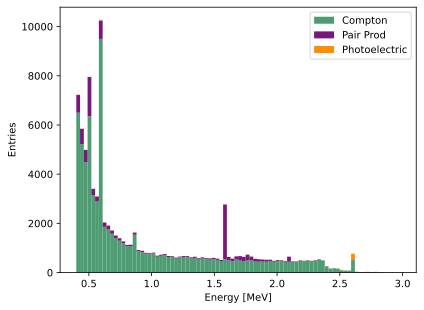

In [29]:
# Get the hit tables and plot the total energy deposited in the TPC
# Sum the energy of the hits and bin into a histogram
hit_tot_energy = hits_v[0][hits_v[0].label == "ACTIVE"]
hit_tot_energy = hit_tot_energy.groupby('event_id')['energy'].sum().reset_index(name='hit_tot_energy')

# Also merge this event energy into the main dataframe
# Merge the original DataFrame with the summed energy DataFrame based on 'event'
hits_contained_df = pd.merge(hits_v[0], hit_tot_energy, on='event_id')
plt.figure()

pair  = hit_tot_energy[hit_tot_energy.event_id.isin(pair_ev_ids)]
compt = hit_tot_energy[hit_tot_energy.event_id.isin(compt_ev_ids)]
photo = hit_tot_energy[hit_tot_energy.event_id.isin(photopeak_ev_ids)]

plt.hist([compt.hit_tot_energy, pair.hit_tot_energy, photo.hit_tot_energy], bins=np.arange(0.4, 3, 0.03), stacked=True, label=["Compton", "Pair Prod", "Photoelectric"], color=['#4e9c72', '#78187d', 'darkorange']);

# plt.hist(hit_tot_energy.hit_tot_energy, bins = 100, histtype="step", color = "black");
plt.legend()
plt.ylabel("Entries")
plt.xlabel("Energy [MeV]")
plt.savefig("../../../Projects/Bremsstrahlung/TechnicalNote/Images/EventSpectrum.pdf")

Double escape events

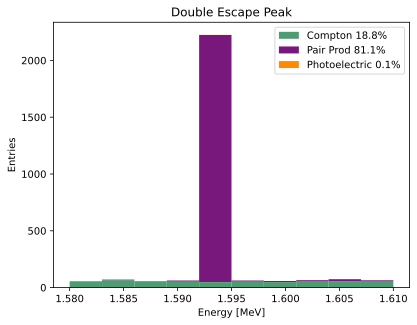

In [30]:
# Get the DE peak events
DE_hits = hits_contained_df[(hits_contained_df.hit_tot_energy > 1.58) & (hits_contained_df.hit_tot_energy < 1.61)  ]
DE_event_ids = DE_hits.event_id

# plt.figure()
# weights = scale_factor*np.ones(len(hit_tot_energy[hit_tot_energy.event_id.isin(PP_event_ids)]))
# plt.hist(hit_tot_energy[hit_tot_energy.event_id.isin(PP_event_ids)].hit_tot_energy, weights = weights);

plt.figure()
tot_events = len(compt[compt.event_id.isin(DE_event_ids)]) + len(pair[pair.event_id.isin(DE_event_ids)]) + len(photo[photo.event_id.isin(DE_event_ids)]) 
compt_frac = 100 * len(compt[compt.event_id.isin(DE_event_ids)]) / tot_events
pair_frac  = 100 * len(pair[pair.event_id.isin(DE_event_ids)]) / tot_events
photo_frac = 100 * len(photo[photo.event_id.isin(DE_event_ids)]) / tot_events

plt.hist([compt[compt.event_id.isin(DE_event_ids)].hit_tot_energy, pair[pair.event_id.isin(DE_event_ids)].hit_tot_energy, photo[photo.event_id.isin(DE_event_ids)].hit_tot_energy], bins=np.arange(1.58, 1.61, 0.003), stacked=True, label=[f"Compton {compt_frac:.1f}%", f"Pair Prod {pair_frac:.1f}%", f"Photoelectric {photo_frac:.1f}%"], color=['#4e9c72', '#78187d', 'darkorange']);
plt.legend()
plt.ylabel("Entries")
plt.xlabel("Energy [MeV]")
plt.title("Double Escape Peak")
plt.savefig("../../../Projects/Bremsstrahlung/TechnicalNote/Images/EventSpectrumDE.pdf")


### Photopeak events

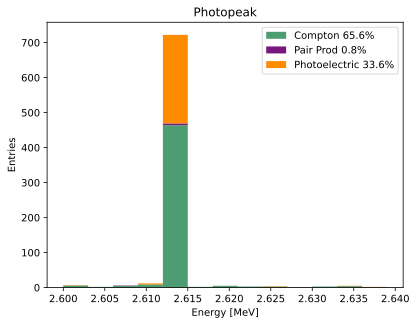

In [31]:
# Get the DE peak events
PP_hits = hits_contained_df[(hits_contained_df.hit_tot_energy > 2.6) & (hits_contained_df.hit_tot_energy < 2.64) ]
PP_event_ids = PP_hits.event_id

# plt.figure()
# weights = scale_factor*np.ones(len(hit_tot_energy[hit_tot_energy.event_id.isin(PP_event_ids)]))
# plt.hist(hit_tot_energy[hit_tot_energy.event_id.isin(PP_event_ids)].hit_tot_energy, weights = weights, bins = np.arange(2.6,2.64, 0.005));


plt.figure()
tot_events = len(compt[compt.event_id.isin(PP_event_ids)]) + len(pair[pair.event_id.isin(PP_event_ids)]) + len(photo[photo.event_id.isin(PP_event_ids)]) 
compt_frac = 100 * len(compt[compt.event_id.isin(PP_event_ids)]) / tot_events
pair_frac  = 100 * len(pair[pair.event_id.isin(PP_event_ids)]) / tot_events
photo_frac = 100 * len(photo[photo.event_id.isin(PP_event_ids)]) / tot_events

plt.hist([compt[compt.event_id.isin(PP_event_ids)].hit_tot_energy, pair[pair.event_id.isin(PP_event_ids)].hit_tot_energy, photo[photo.event_id.isin(PP_event_ids)].hit_tot_energy], bins=np.arange(2.6, 2.64, 0.003), stacked=True, label=[f"Compton {compt_frac:.1f}%", f"Pair Prod {pair_frac:.1f}%", f"Photoelectric {photo_frac:.1f}%"], color=['#4e9c72', '#78187d', 'darkorange']);
plt.legend()
plt.ylabel("Entries")
plt.xlabel("Energy [MeV]")
plt.title("Photopeak")
plt.savefig("../../../Projects/Bremsstrahlung/TechnicalNote/Images/EventSpectrumPP.pdf")


### Get all the gammas in the event and the bremsstrahlung 
- Also applies conainment requirement of the gammas 
- Applies 2 cm cut to the bremstrahlung (this accounts for voxelation, but not necissarily the diffusion yet)

In [32]:
# Plot the distance of the gammas and bin in a histogram
gammas = parts_v[0][parts_v[0]["particle_name"] == "gamma" ]

# Get all gammas that originate in the DE/PP peak
gammas_DE = gammas[gammas.event_id.isin(DE_event_ids) ]
gammas_PP = gammas[gammas.event_id.isin(PP_event_ids) ]

# Create a table of bremstrahlung gammas
eBrem_DE = gammas_DE[(gammas_DE["creator_proc"] == "eBrem")]
eBrem_PP = gammas_PP[(gammas_PP["creator_proc"] == "eBrem")]



In [33]:
n_photon_DE = []
n_photon_PP = []

# Start with DE events
eventids = eBrem_DE.event_id.unique()
for e in eventids:
    # The gammas dataframe is all gammas in the double escape peak
    event_DE = eBrem_DE[ eBrem_DE["event_id"] == e]
    n_photon_DE.append(len(event_DE))

eventids = eBrem_PP.event_id.unique()
for e in eventids:
    # The gammas dataframe is all gammas in the double escape peak
    event_PP = eBrem_PP[ eBrem_PP["event_id"] == e]
    n_photon_PP.append(len(event_PP))


#### Plot the multiplicity and the energy spectrum broken down by primary interaction mode

Text(0.5, 1.0, 'Double Escape')

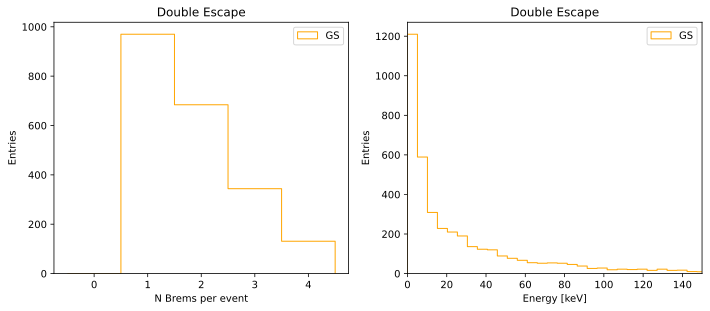

In [34]:
bin_edges = np.arange(-0.5, 5.5, 1)
bin_centers = np.arange(0, 5, 1)

plt.figure(figsize=(18, 10))  # Adjust the figure size as needed

# Multiplicities
plt.subplot(2, 3, 1);
plt.hist(n_photon_DE, bins = bin_edges, histtype="step", label = "GS", color = "orange");
plt.xlabel("N Brems per event")
plt.ylabel("Entries")
plt.xticks(bin_centers) ;
plt.legend()
plt.title("Double Escape")

# Energies
plt.subplot(2, 3, 2);
plt.hist(eBrem_DE.kin_energy*1e3, bins=np.linspace(0, 300, 60), histtype="step", label=["GS"], color = "orange");
plt.legend()
plt.xlabel("Energy [keV]")
plt.ylabel("Entries")
plt.xlim(0, 150)
plt.title("Double Escape")

#### Lookhow often a bremsstrahlung in the double escape/photopeak peak re-interacts inside the active
These are gamma daughters of the brem with final volume in the active and creator proc is not a phot which would correpond to x-rays

/Users/mistryk2/opt/anaconda3/envs/local/lib/python3.10/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,event_id,particle_id,mother_id,particle_name,creator_proc,final_proc,kin_energy,initial_volume,final_volume,final_x,final_y,final_z,brem_id
3902,1280126,49,43,gamma,compt,phot,0.004097,ACTIVE,ACTIVE,-184.741623,315.080505,758.616211,43
15295,2110089,88,59,gamma,compt,phot,0.029781,ACTIVE,ACTIVE,173.536087,119.575684,552.037720,59
20876,2520001,76,69,gamma,compt,phot,0.003982,ACTIVE,ACTIVE,-168.029343,192.968140,927.499634,69


Percentage of Reinteraction gammas/ total Brem (DE):  0.072992700729927
Mean kin energy of these gammas:  12.620125897228718 keV


(array([2., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([0.0039819 , 0.00656184, 0.00914178, 0.01172172, 0.01430166,
        0.0168816 , 0.01946154, 0.02204148, 0.02462142, 0.02720136,
        0.0297813 ], dtype=float32),
 <BarContainer object of 10 artists>)

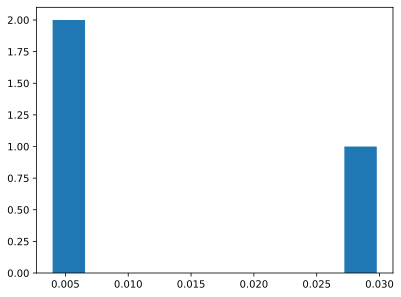

In [35]:
# display(gammas_DE[gammas_DE.event_id == 990022])

eBrem_DE_temp = eBrem_DE[["event_id", "particle_id"]]
eBrem_DE_temp.rename(columns={'particle_id': 'brem_id'}, inplace=True)

gammas_DE_merge = pd.merge(gammas_DE, eBrem_DE_temp, on='event_id', how='inner')

# display(gammas_DE_merge[gammas_DE_merge.event_id == 990022])

reint_DE_brem = gammas_DE_merge[ (gammas_DE_merge.final_volume == "ACTIVE") & (gammas_DE_merge.mother_id == gammas_DE_merge.brem_id) & (gammas_DE_merge.creator_proc != "phot")  ]

display(reint_DE_brem)

print("Percentage of Reinteraction gammas/ total Brem (DE): ", 100*len(reint_DE_brem)/len(eBrem_DE))
print("Mean kin energy of these gammas: ", reint_DE_brem.kin_energy.mean()*1000, "keV")

plt.figure()
plt.hist(reint_DE_brem.kin_energy)

In [36]:

eBrem_PP_temp = eBrem_PP[["event_id", "particle_id"]]
eBrem_PP_temp.rename(columns={'particle_id': 'brem_id'}, inplace=True)

gammas_PP_merge = pd.merge(gammas_PP, eBrem_PP_temp, on='event_id', how='inner')

# display(gammas_DE_merge[gammas_DE_merge.event_id == 990022])

reint_PP_brem = gammas_PP_merge[ (gammas_PP_merge.final_volume == "ACTIVE") & (gammas_PP_merge.mother_id == gammas_PP_merge.brem_id) & (gammas_PP_merge.creator_proc != "phot")  ]

display(reint_PP_brem)

print("Percentage of Reinteraction gammas / total Brem (PP): ", 100*len(reint_PP_brem)/len(eBrem_PP))
print("Mean kin energy of these gammas: ", reint_PP_brem.kin_energy.mean()*1000, "keV")


/Users/mistryk2/opt/anaconda3/envs/local/lib/python3.10/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,event_id,particle_id,mother_id,particle_name,creator_proc,final_proc,kin_energy,initial_volume,final_volume,final_x,final_y,final_z,brem_id


Percentage of Reinteraction gammas / total Brem (PP):  0.0
Mean kin energy of these gammas:  nan keV


#### Lets now look at the reconstructed stuff

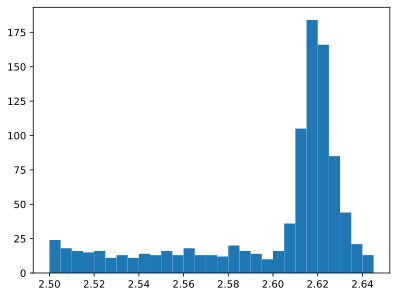

In [37]:
# Now lets plot the energy distribution of the esmeralda hits

# Sum the energy of the hits and bin into a histogram
chit_tot_energy = chits_v[0].groupby('event')['Ec'].sum().reset_index(name='hit_tot_energy')

plt.figure()
plt.hist(chit_tot_energy.hit_tot_energy, bins = np.arange(2.5, 2.65, 0.005));

In [38]:
# Get the reco events in the DE peak
reco_DE_event_ids      = chit_tot_energy[(chit_tot_energy.hit_tot_energy > 1.58) & (chit_tot_energy.hit_tot_energy < 1.61)  ].event

reco_DE_events = chits_v[0][chits_v[0].event.isin(reco_DE_event_ids)]

# Also apply cut so that we look at events in the MC sample
reco_DE_events = chits_v[0][chits_v[0].event.isin(eBrem_contained.event_id.unique())] 

display(reco_DE_events)
# print(reco_DE_events.event.unique())

plt.figure()
plt.hist(chit_tot_energy[chit_tot_energy.event.isin(reco_DE_event_ids)].hit_tot_energy, bins = np.arange(1.525, 1.625, 1e-3)); # Energy resolution paper uses 1 keV bins


NameError: name 'eBrem_contained' is not defined

# Plot the visible bremstrahlung and their energy distribution in true 
- Define the visible bremsstrahlung as a brem with distance greater than 3 cm

In [ ]:
bin_edges = np.arange(-0.5, 5.5, 1)
bin_centers = np.arange(0, 5, 1)

eventids = gammas.event_id.unique()

n_photon_v = []
E_brem_pair = [] # Bremsstrahlung energies from pair production
E_brem_compt = [] # Bremsstrahlung energies from compton scattering

E_gamma = [] # Gamma energies


for e in eventids:

    # The gammas dataframe is all gammas in the double escape peak
    event_gamma = gammas[ gammas["event_id"] == e]

    # Get the bremsstrahlung
    all_Brem  =  event_gamma[  (event_gamma["creator_proc"] == "eBrem")  ]
    not_Brem  =  event_gamma[  (event_gamma["creator_proc"]  != "eBrem")  ]

    # Containment
    all_Brem = all_Brem[all_Brem.final_volume == "ACTIVE"]
    not_Brem = not_Brem[not_Brem.final_volume == "ACTIVE"]

    # Differentiate the compton from pair conv events 
    PairConv_Brem = all_Brem[all_Brem.event_id.isin(pair_cov_gamma_ev_ids) ]
    Compt_Brem    = all_Brem[~all_Brem.event_id.isin(pair_cov_gamma_ev_ids) ]

    # Remove gammas less than 0.5 MeV (to get rid of the primary gamma from the decay and stuff like the annihilation ones)
    not_Brem =  not_Brem[ not_Brem.kin_energy < 0.5]
    
    # Pair Prod events
    E_brem_event_pair = PairConv_Brem['kin_energy'].tolist()
    E_brem_pair = E_brem_pair + E_brem_event_pair

    # Pair Prod events
    E_brem_event_compt = Compt_Brem['kin_energy'].tolist()
    E_brem_compt = E_brem_compt + E_brem_event_compt

    # Get the energy of the gammas that are not brem
    E_gamma_event = not_Brem['kin_energy'].tolist()
    E_gamma = E_gamma + E_gamma_event
    
    n_photon_v.append(len(PairConv_Brem))
    # n_photon_v.append(len(PairConv_Brem[PairConv_Brem.kin_energy>5e-3]))# This is if we want to apply an energy cut 

In [ ]:
plt.figure(figsize=(18, 10))  # Adjust the figure size as needed

# Multiplicities
plt.subplot(2, 3, 1);
plt.hist(n_photon_v, bins = bin_edges, color=cmap(0));
plt.xlabel("N Brems per event")
plt.ylabel("Entries")
plt.xticks(bin_centers) ;

# Energies
plt.subplot(2, 3, 2);
E_brem_pair_scale = np.full_like(E_brem_pair, 1.0)
E_brem_compt_scale = np.full_like(E_brem_compt, 1.0)
E_gamma_scale = np.full_like(E_gamma, 1.0)

plt.hist([np.array(E_brem_pair)*1e3, np.array(E_brem_compt)*1e3, np.array(E_gamma)*1e3], bins=np.linspace(0, 300, 60),weights=[E_brem_pair_scale,E_brem_compt_scale, E_gamma_scale], stacked=True, alpha=0.7, label=["Brems e+e- (sig)","Brems e- (bkg)","Gamma Other (bkg)"]);
plt.legend(title="Stacked")
plt.xlabel("Energy [keV]")
plt.ylabel("Entries")
plt.xlim(0, 150)

## Plot the events in 2D and 3D 

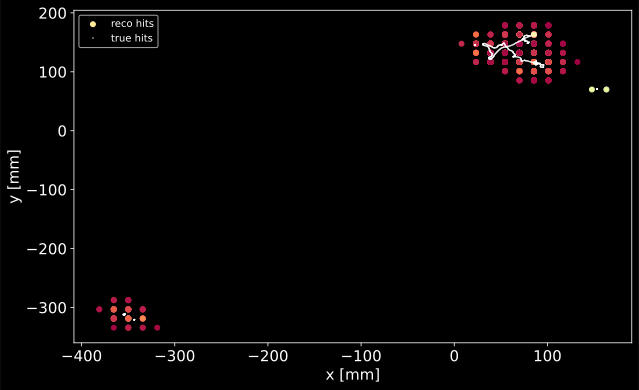

In [58]:
%matplotlib inline
# Plot a reco event
ev_id = 1270130

reco_event = chits_v[0][chits_v[0].event == ev_id]

event = DE_hits[DE_hits.event_id == ev_id]
# event_brem = eBrem_contained[eBrem_contained.event_id == ev_id ]
# event_gamma = gammas_contained[gammas_contained.event_id == ev_id ]

fig, ax  = plt.subplots(figsize=(10, 6))
fig.set_facecolor('black')
ax.set_facecolor('black')
plt.scatter(reco_event.X, reco_event.Y,c= reco_event.Ec, cmap='Spectral', s=25, label = "reco hits")
plt.plot(event.x, event.y, ".", c = "white", ms = 1, label = "true hits")
# plt.scatter(event_gamma.final_x,event_gamma.final_y, color = "g", marker = "*", s = 100, label = "gamma")
# plt.scatter(event_brem.final_x,event_brem.final_y, color = "yellow", marker = "*",s = 100, label = "Brem")


plt.xlabel("x [mm]", fontsize = 15)
plt.ylabel("y [mm]", fontsize = 15)
plt.tick_params(axis='both', which='both', labelsize=15)  # Adjust labelsize as needed

# Set the color of the axes labels and ticks to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Set the color of the spines (borders) to white
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
legend = plt.legend(facecolor = "black")
# Set the text color of the legend
for text in legend.get_texts():
    text.set_color('white')  # Set the text color to red

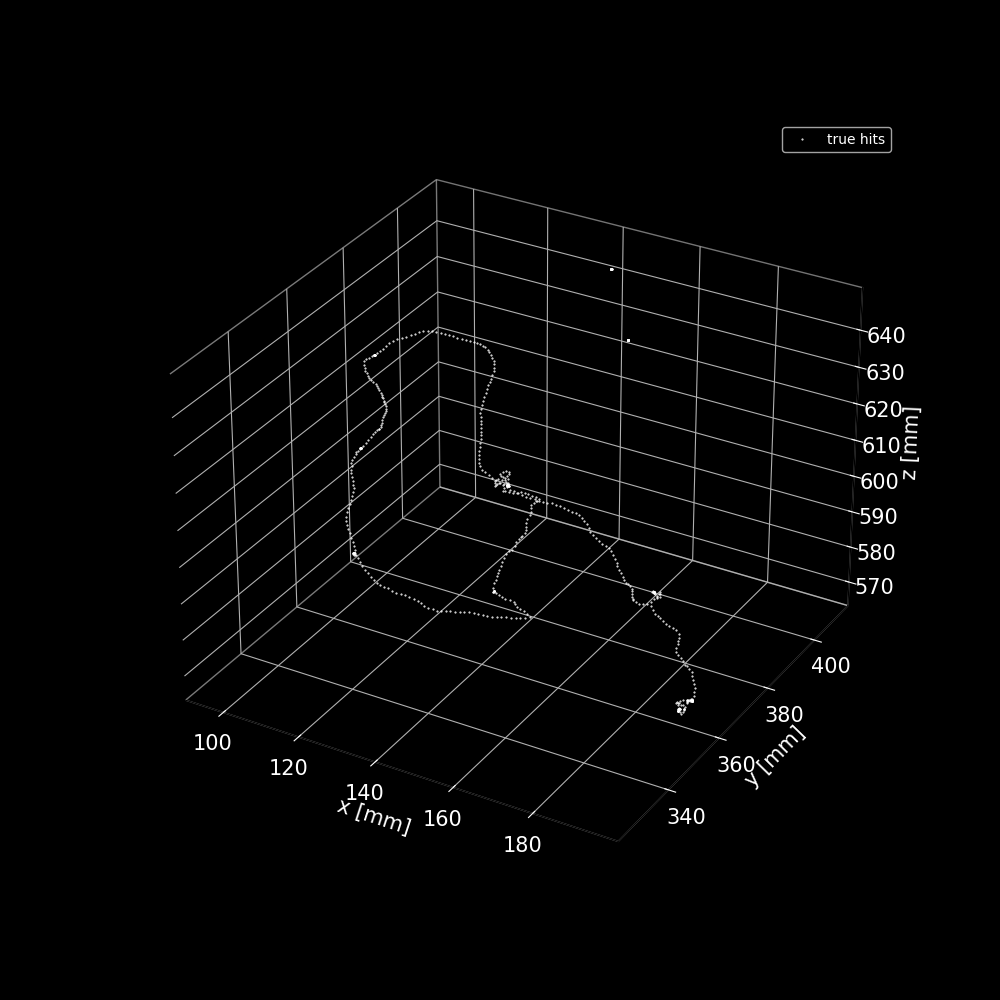

In [ ]:
%matplotlib widget
# Make a 3D view of the track
fig  = plt.figure(figsize=(10, 10))

# Create 3D axes
ax = fig.add_subplot(111, projection='3d')

fig.set_facecolor('black')
ax.set_facecolor('black')
# ax.scatter(reco_event.X, reco_event.Y,  reco_event.Z,c= reco_event.Ec, cmap='Spectral', s=25, label = "reco hits")
plt.plot(event.x, event.y,event.z, ".", c = "white", ms = 1, label = "true hits")
# ax.scatter(event_gamma.final_x,event_gamma.final_y, event_gamma.final_z, color = "g", marker = "*", s = 100, label = "gamma")
# ax.scatter(event_brem.final_x,event_brem.final_y, event_brem.final_z, color = "yellow", marker = "*",s = 100, label = "Brem")


ax.set_xlabel("x [mm]", fontsize = 15)
ax.set_ylabel("y [mm]", fontsize = 15)
ax.set_zlabel("z [mm]", fontsize = 15)
plt.tick_params(axis='both', which='both', labelsize=15)  # Adjust labelsize as needed

# Set the color of the axes labels and ticks to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.zaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.tick_params(axis='z', colors='white')

# Set the color of the spines (borders) to white
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

# Remove background (axis)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

legend = plt.legend(facecolor = "black")

# Set the text color of the legend
for text in legend.get_texts():
    text.set_color('white')  # Set the text color to red

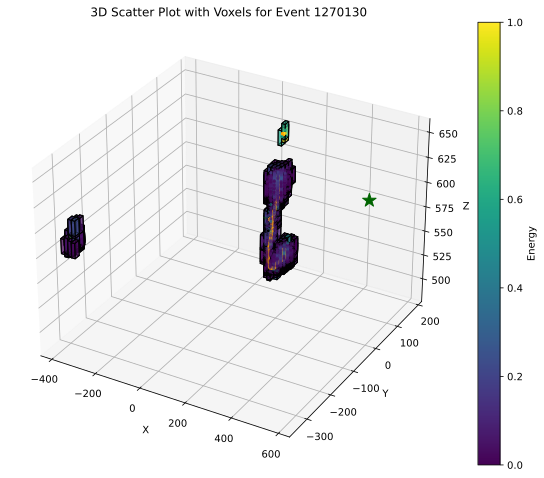

In [59]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.colors as mcolors
import numpy as np

reco_DE_event_ids = chit_tot_energy[(chit_tot_energy.hit_tot_energy > 1.58) & (chit_tot_energy.hit_tot_energy < 1.62)].event
reco_DE_events = chits_v[0][chits_v[0].event.isin(reco_DE_event_ids)]

ev_id = 1270130
reco_DE_event = reco_DE_events[reco_DE_events.event == ev_id]

event_brem = eBrem_DE[eBrem_DE.event_id == ev_id]

# Set up figure and 3D axis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Normalize the energy for the color map
norm = mcolors.Normalize(vmin=reco_DE_event.Ec.min(), vmax=reco_DE_event.Ec.max())

# Scatter plot for point locations
scatter = ax.scatter(reco_DE_event.X, reco_DE_event.Y, reco_DE_event.Z, c=norm(reco_DE_event.Ec), cmap='viridis', marker=".")
ax.scatter(event.x, event.y, event.z, marker="o", s=8, color = 'orange')
ax.scatter(event_brem.final_x, event_brem.final_y, event_brem.final_z, color="darkgreen", marker="*", s=200)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title(f"3D Scatter Plot with Voxels for Event {ev_id}")

# Voxel size
voxel_size = 15

# Loop through each point and create a voxel around it
for x, y, z, ec in zip(reco_DE_event.X, reco_DE_event.Y, reco_DE_event.Z, reco_DE_event.Ec):
    # Define the corners of the voxel
    corners = np.array([
        [x - voxel_size/2, y - voxel_size/2, z - voxel_size/2],
        [x + voxel_size/2, y - voxel_size/2, z - voxel_size/2],
        [x + voxel_size/2, y + voxel_size/2, z - voxel_size/2],
        [x - voxel_size/2, y + voxel_size/2, z - voxel_size/2],
        [x - voxel_size/2, y - voxel_size/2, z + voxel_size/2],
        [x + voxel_size/2, y - voxel_size/2, z + voxel_size/2],
        [x + voxel_size/2, y + voxel_size/2, z + voxel_size/2],
        [x - voxel_size/2, y + voxel_size/2, z + voxel_size/2]
    ])
    
    # List of sides' vertices indexes
    faces = [
        [corners[j] for j in [0, 1, 2, 3]],
        [corners[j] for j in [4, 5, 6, 7]],
        [corners[j] for j in [0, 3, 7, 4]],
        [corners[j] for j in [1, 2, 6, 5]],
        [corners[j] for j in [0, 1, 5, 4]],
        [corners[j] for j in [2, 3, 7, 6]]
    ]

    # Create a voxel with the specified faces
    voxel = Poly3DCollection(faces, color=plt.cm.viridis(norm(ec)), edgecolor='k', alpha=0.5)
    ax.add_collection3d(voxel)

# Add a color bar
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical')
cbar.set_label('Energy')

plt.show()


In [60]:
pd.set_option('display.max_rows', 200) 
display(parts_v[0][parts_v[0].event_id == ev_id])
display(DE_hits[DE_hits.event_id == ev_id])

,event_id,particle_id,mother_id,particle_name,creator_proc,final_proc,kin_energy,initial_volume,final_volume,final_x,final_y,final_z
9601,1270130,1,0,Tl208,none,RadioactiveDecay,0.000000e+00,PORT_TUBE_AIR,PORT_TUBE_AIR,396.844574,395.604614,531.877563
9602,1270130,4,1,e-,RadioactiveDecay,eIoni,5.631573e-01,PORT_TUBE_AIR,PORT_TUBE_1a,398.930817,393.599762,535.612915
9603,1270130,3,1,anti_nu_e,RadioactiveDecay,Transportation,1.238009e+00,PORT_TUBE_AIR,WORLD,-12500.000000,4716.425293,926.999878
9604,1270130,2,1,Pb208[3197.711],RadioactiveDecay,RadioactiveDecay,3.201247e-06,PORT_TUBE_AIR,PORT_TUBE_AIR,396.844574,395.604614,531.877563
9605,1270130,6,2,gamma,RadioactiveDecay,phot,5.831881e-01,PORT_TUBE_AIR,ACTIVE,-353.439056,-311.764038,584.898987
9606,1270130,33,6,e-,phot,msc,3.388000e-05,ACTIVE,ACTIVE,-353.439209,-311.764130,584.898865
9607,1270130,32,6,e-,phot,msc,4.653000e-05,ACTIVE,ACTIVE,-353.439056,-311.764069,584.898987
9608,1270130,31,6,e-,phot,msc,2.056000e-05,ACTIVE,ACTIVE,-353.439148,-311.763916,584.899170
9609,1270130,30,6,e-,phot,msc,4.653000e-05,ACTIVE,ACTIVE,-353.439148,-311.763855,584.898926
9610,1270130,29,6,e-,phot,eIoni,2.056000e-05,ACTIVE,ACTIVE,-353.439056,-311.764221,584.898865


,event_id,x,y,z,energy,particle_id,hit_tot_energy
3445244,1270130,-353.439056,-311.764038,584.898987,0.000225,6,1.584265
3445245,1270130,-353.439209,-311.764130,584.898865,0.000034,33,1.584265
3445246,1270130,-353.439056,-311.764069,584.898987,0.000047,32,1.584265
3445247,1270130,-353.439148,-311.763916,584.899170,0.000021,31,1.584265
3445248,1270130,-353.439148,-311.763855,584.898926,0.000047,30,1.584265
...,...,...,...,...,...,...,...
3445841,1270130,153.338089,70.652946,646.819824,0.001366,106,1.584265
3445842,1270130,153.317459,70.642761,646.838989,0.002065,106,1.584265
3445843,1270130,153.317734,70.655998,646.857178,0.002171,106,1.584265
3445844,1270130,153.319550,70.649574,646.843140,0.000694,106,1.584265
